Precision = True positive / True Positive + False Positive
Recall = True Positive / True Positive + False Negative

False Positive means that Prediction True, but in actuallity its false
False Negative means that Prediction false, but in actuality its true


F1 Score is the harmonic mean of precision and recall. 
this a good metric when FP and FN are equally costly or equally important or true negative is high

F1 = 2/((1/precision) + (1/recall))

In [348]:
#metode classification : K-NN, Decision Tree, Logistic Regression, SVM
#first import library
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [349]:
#import data
data = pd.read_csv("C:/Users/Richard Gregorius/Documents/Binus/Semester 4/Machine Learning/LEC/diabetes.csv", sep=";")
data.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,72,0,33.6,50,1
1,85,66,0,26.6,31,0
2,183,64,0,23.3,32,1
3,89,66,94,28.1,21,0
4,137,40,168,43.1,33,1


In [350]:
#drop na and duplicate
data = data.dropna()
data.drop_duplicates()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,72,0,33.6,50,1
1,85,66,0,26.6,31,0
2,183,64,0,23.3,32,1
3,89,66,94,28.1,21,0
4,137,40,168,43.1,33,1
...,...,...,...,...,...,...
763,101,76,180,32.9,63,0
764,122,70,0,36.8,27,0
765,121,72,112,26.2,30,0
766,126,60,0,30.1,47,1


In [351]:
#split data
X = data.iloc[:,:5]
y = data.loc[:,['Outcome']]


In [352]:
# library to make train-test data
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [353]:
# Make the train test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66, stratify=y)

logistic regression

In [354]:
#import library
import statsmodels.formula.api as smf
import statsmodels.api as sm

Train data

In [355]:
reglog = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.625333
         Iterations 5


In [356]:
print(reglog.summary())
# coef = beta
# p-value = cek correlation dengan basis alpha (> alpha tidak berkorelasi)
# uji parsial P>|z| jika lebih kecil dari alpha maka h0 ditolak dan variabel mempengaruhi

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      609
Method:                           MLE   Df Model:                            4
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                 0.03279
Time:                        00:38:28   Log-Likelihood:                -383.95
converged:                       True   LL-Null:                       -396.97
Covariance Type:            nonrobust   LLR p-value:                 3.112e-05
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Glucose           0.0121      0.003      4.172      0.000       0.006       0.018
BloodPressure    -0.0273      0.005     -5.641      0.000      -0.037      -0.018
Insulin           0.0009      0.001     

In [357]:
# Check under/over fitting, predict using both train and test dataset
yhat_train = reglog.predict(x_train)
yhat_train.head()

565    0.415382
174    0.288770
294    0.620707
644    0.334439
352    0.163806
dtype: float64

In [358]:
yp_train = (yhat_train >= 0.5).astype(int)
yp_train.head()

565    0
174    0
294    1
644    0
352    0
dtype: int32

In [359]:
# import confusion matrix to create it
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

$$\frac {e^{(\beta_0 + \beta_1 * x_1 + ....)}}{1+e^{(\beta_0 + \beta_1 * x_1 + ....)}}$$

In [360]:
# buat confusion matrix
cm_train = confusion_matrix(y_train, yp_train)

In [361]:
precision = cm_train[0][0]/(cm_train[0][0] + cm_train[0][1])
precision

0.8775

In [362]:
recall = cm_train[0][0]/(cm_train[0][0] + cm_train[1][0])
recall

0.6964285714285714

In [363]:
print(classification_report(yp_train,y_train))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       504
           1       0.29      0.55      0.38       110

    accuracy                           0.67       614
   macro avg       0.58      0.63      0.58       614
weighted avg       0.77      0.67      0.70       614



ROC auc score

In [364]:
from sklearn.metrics import roc_auc_score

In [365]:
roc_auc_score(y_train, yp_train)

0.5812733644859812

Test data

In [366]:
yhat_test = reglog.predict(x_test)
yp_test = (yhat_test >= 0.5).astype(int)
cm_test = confusion_matrix(y_test,yp_test)
print(classification_report(yp_test,y_test))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       127
           1       0.33      0.67      0.44        27

    accuracy                           0.71       154
   macro avg       0.62      0.69      0.62       154
weighted avg       0.81      0.71      0.74       154



KNN

In [367]:
from sklearn.neighbors import KNeighborsClassifier

Train data

In [368]:
#default 5
knn1 = KNeighborsClassifier(n_neighbors=5)

In [369]:
knn1.fit(x_train, y_train)

c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [370]:
yhat_train = knn1.predict(x_train)

In [371]:
cm_train_knn = confusion_matrix(y_train, yhat_train)
print(cm_train_knn)

[[355  45]
 [ 76 138]]


In [372]:
print(classification_report(yhat_train,y_train))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       431
           1       0.64      0.75      0.70       183

    accuracy                           0.80       614
   macro avg       0.77      0.79      0.77       614
weighted avg       0.82      0.80      0.81       614



Test data

In [373]:
yhat_test = knn1.predict(x_test)
cm_test_knn = confusion_matrix(y_test, yhat_test)
print(classification_report(yhat_test, y_test))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        95
           1       0.67      0.61      0.64        59

    accuracy                           0.73       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



Naive Bayes

In [374]:
from sklearn.naive_bayes import GaussianNB

Train data

In [375]:
nb = GaussianNB()

In [376]:
nb.fit(x_train, y_train)

c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [377]:
yhat_train = nb.predict(x_train)

In [378]:
cm_train_nb = confusion_matrix(y_train, yhat_train)
cm_train_nb

array([[346,  54],
       [ 92, 122]], dtype=int64)

In [379]:
print(classification_report(yhat_train, y_train))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       438
           1       0.57      0.69      0.63       176

    accuracy                           0.76       614
   macro avg       0.72      0.74      0.73       614
weighted avg       0.78      0.76      0.77       614



Test data

In [380]:
yhat_test = nb.predict(x_test)
cm_test_nb = confusion_matrix(y_test, yhat_test)
print(classification_report(yhat_test, y_test))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       103
           1       0.65      0.69      0.67        51

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.78      0.77      0.77       154



Decision Tree

In [381]:
from sklearn import tree
import matplotlib.pyplot as plt

Train data

In [382]:
dt = tree.DecisionTreeClassifier(max_depth=5)

In [383]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.5027777777777778, 0.9166666666666666, 'X[0] <= 127.5\ngini = 0.454\nsamples = 614\nvalue = [400, 214]'),
 Text(0.25555555555555554, 0.75, 'X[4] <= 28.5\ngini = 0.318\nsamples = 398\nvalue = [319, 79]'),
 Text(0.14444444444444443, 0.5833333333333334, 'X[3] <= 30.95\ngini = 0.18\nsamples = 230\nvalue = [207, 23]'),
 Text(0.08888888888888889, 0.4166666666666667, 'X[1] <= 84.0\ngini = 0.03\nsamples = 133\nvalue = [131, 2]'),
 Text(0.044444444444444446, 0.25, 'X[0] <= 106.5\ngini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.022222222222222223, 0.08333333333333333, 'gini = 0.0\nsamples = 93\nvalue = [93, 0]'),
 Text(0.06666666666666667, 0.08333333333333333, 'gini = 0.062\nsamples = 31\nvalue = [30, 1]'),
 Text(0.13333333333333333, 0.25, 'X[3] <= 27.95\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.15555555555555556, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]')

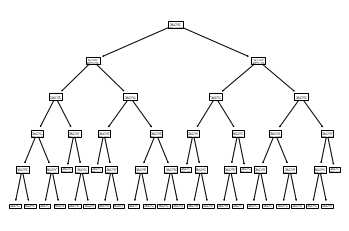

In [384]:
tree.plot_tree(dt)

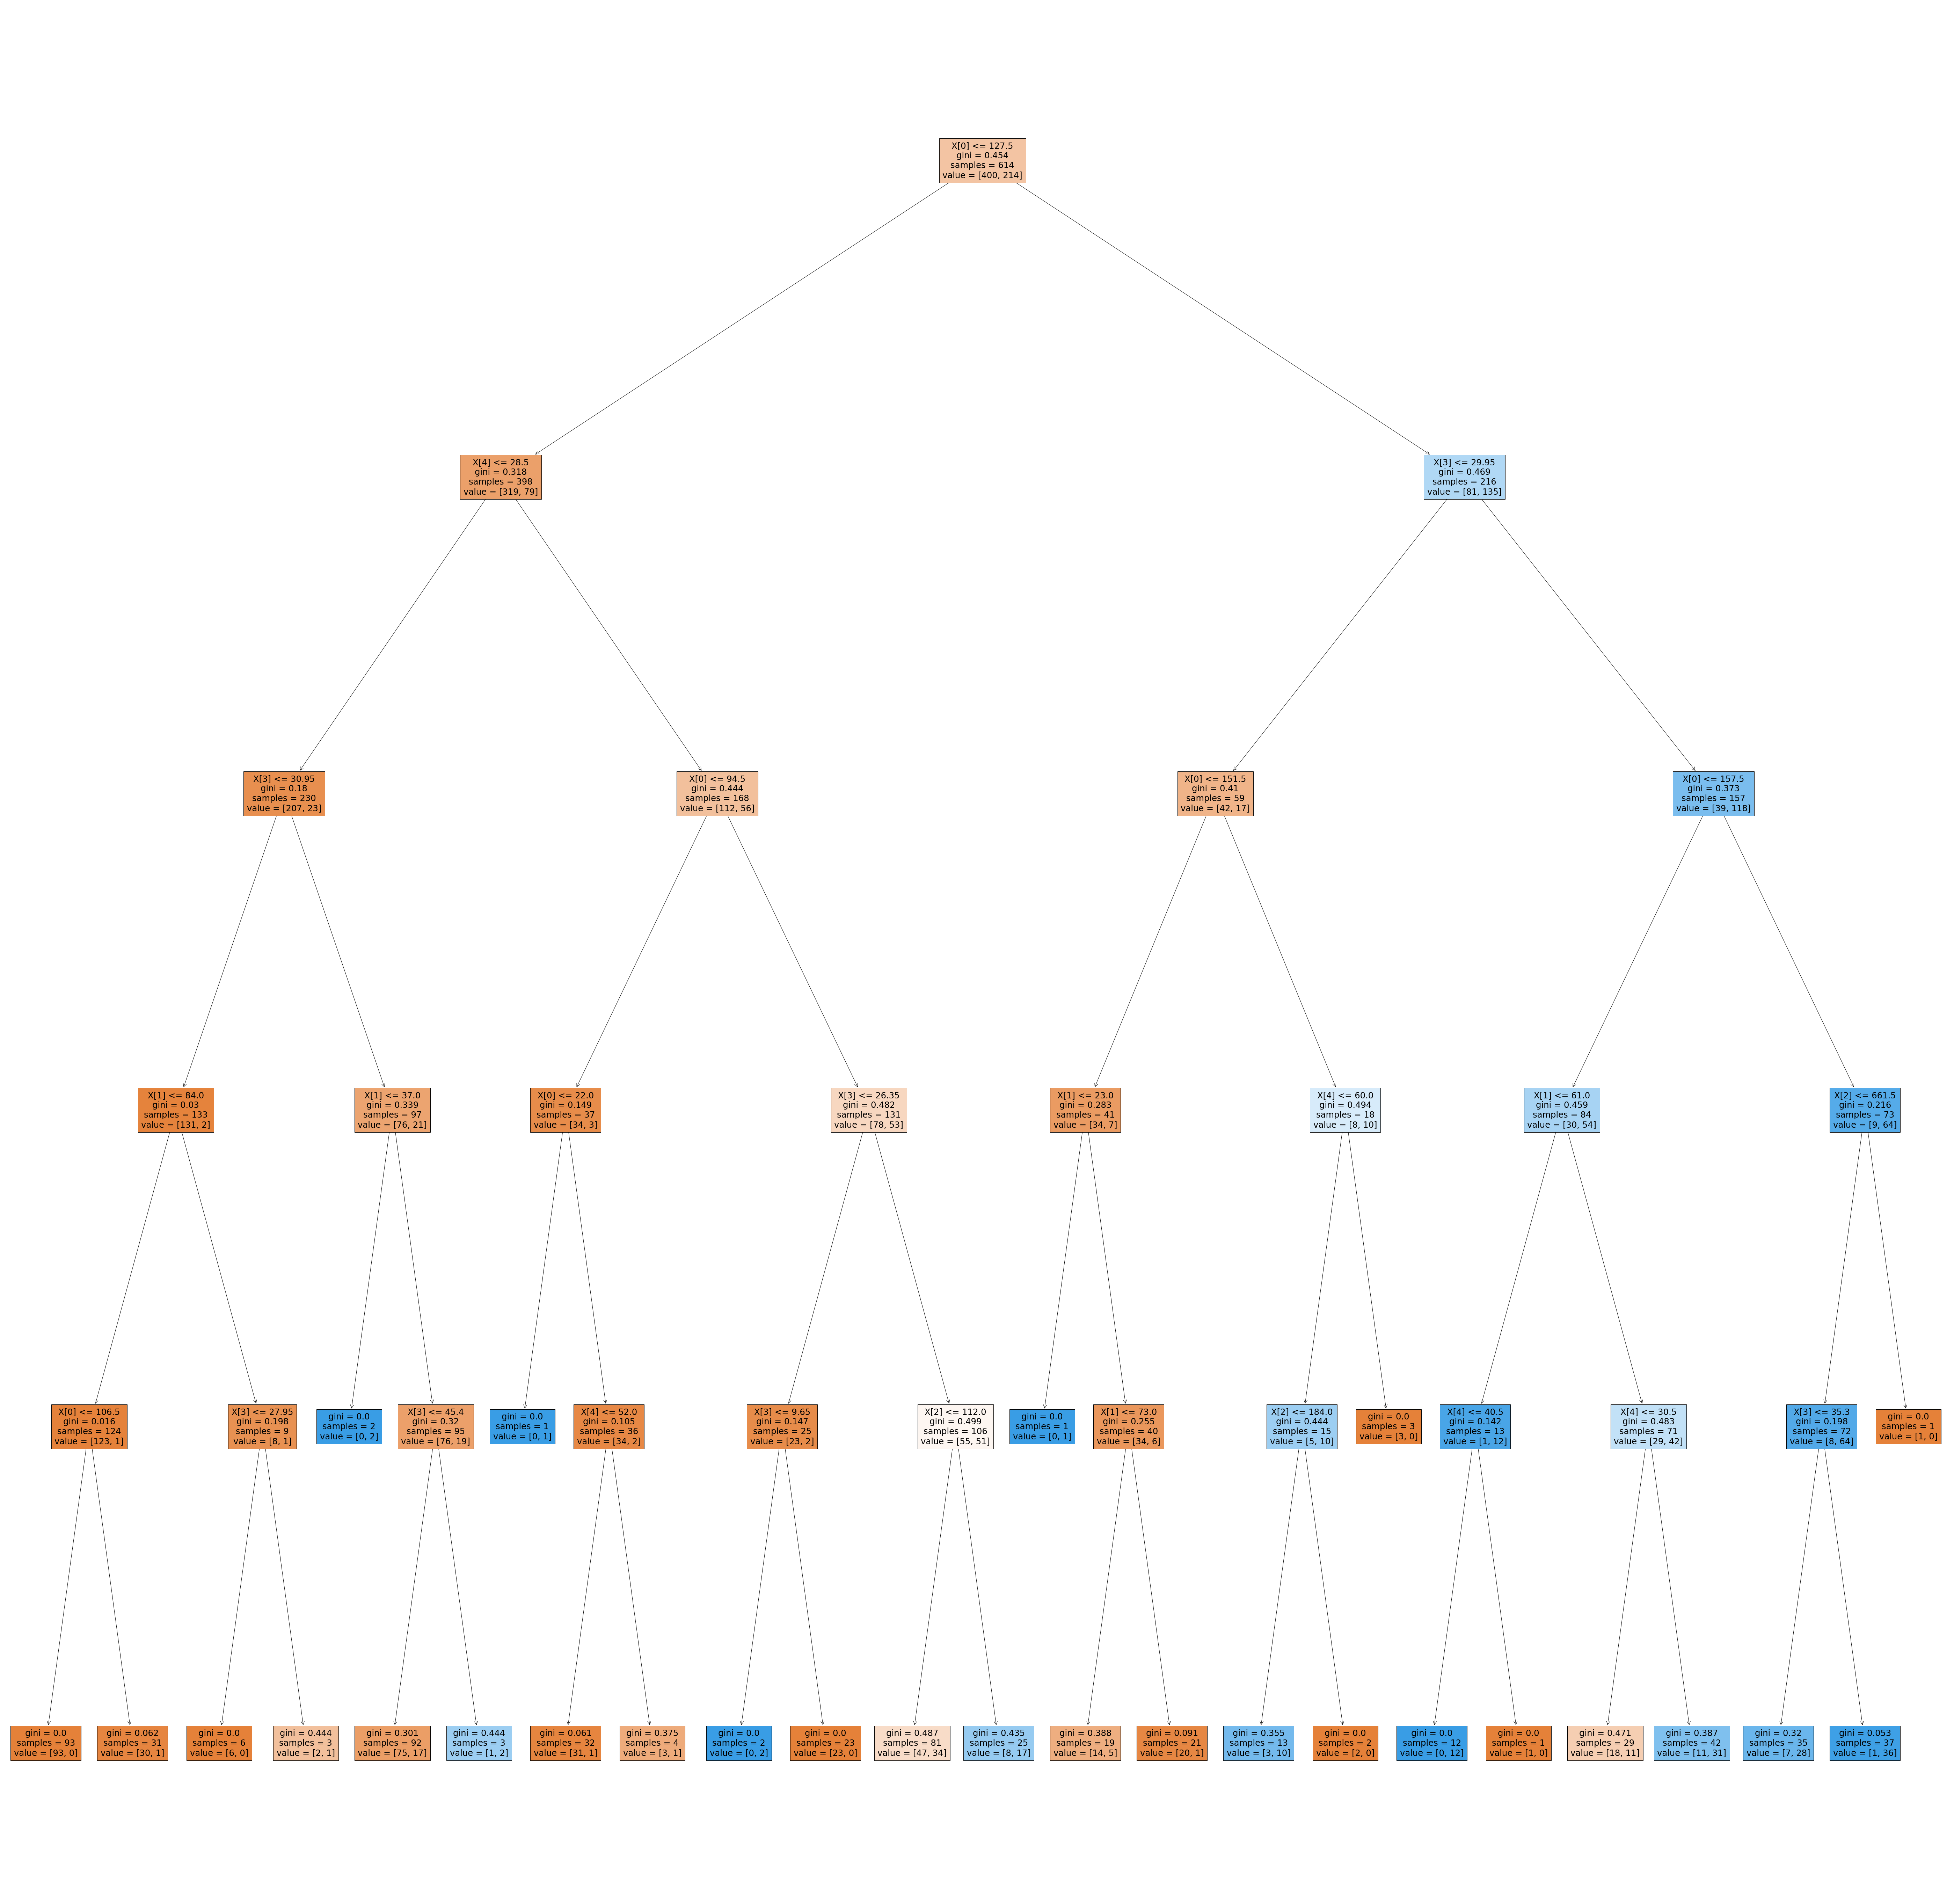

In [385]:
plt_dt = plt.figure(figsize = (100,100))
_ = tree.plot_tree(dt, filled = True)

In [386]:
yhat_train = dt.predict(x_train)

In [387]:
cm_train_dt = confusion_matrix(y_train, yhat_train)

In [388]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       400
           1       0.82      0.66      0.73       214

    accuracy                           0.83       614
   macro avg       0.83      0.79      0.81       614
weighted avg       0.83      0.83      0.83       614



In [389]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       400
           1       0.82      0.66      0.73       214

    accuracy                           0.83       614
   macro avg       0.83      0.79      0.81       614
weighted avg       0.83      0.83      0.83       614



Test data

In [390]:
yhat_test = dt.predict(x_test)
cm_test = confusion_matrix(y_test, yhat_test)
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       100
           1       0.72      0.67      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



random forest

In [391]:
from sklearn.ensemble import RandomForestRegressor

In [392]:
# estimator equals to the number of trees used for the forest
# state means the depth of each tree
# State should be the same
def RandomForest(est):
    rf = RandomForestRegressor(n_estimators = est, random_state = 5)
    rf.fit(x_train, y_train)
    plt_rf = plt.figure(figsize = (100,100))
    
    ypredict_train = rf.predict(x_train)
    ypredict_test = rf.predict(x_test)
    
    yhat_train = (ypredict_train >= 0.5).astype(int)
    yhat_test = (ypredict_test >= 0.5).astype(int)
    
    train_report = classification_report(y_train, yhat_train)
    test_report = classification_report(y_test, yhat_test)
    
    rf_train_acc = classification_report(y_train, yhat_train, output_dict = True)['accuracy']
    rf_test_acc = classification_report(y_test, yhat_test, output_dict = True)['accuracy']
    
    return train_report, test_report, rf_train_acc, rf_test_acc

In [393]:
rft = RandomForest(10)

print("Training Data")
print(rft[0])
print("Training Accuracy = ", rft[2])
print("\n")
print("Testing Data")
print(rft[1])  
print("Testing Accuracy = ", rft[3])

Training Data
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       400
           1       0.98      0.99      0.98       214

    accuracy                           0.99       614
   macro avg       0.99      0.99      0.99       614
weighted avg       0.99      0.99      0.99       614

Training Accuracy =  0.988599348534202


Testing Data
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       100
           1       0.61      0.72      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154

Testing Accuracy =  0.7402597402597403


C:\Users\Richard Gregorius\AppData\Local\Temp\ipykernel_10288\2085109038.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


<Figure size 7200x7200 with 0 Axes>